https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

Logistic Regression & Regularization - 
 - https://towardsdatascience.com/the-basics-logistic-regression-and-regularization-828b0d2d206c
 - https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
 
Solver
- https://medium.com/@venali/conventional-guide-to-supervised-learning-with-scikit-learn-logistic-regression-generalized-e9783c414588

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
path = os.getcwd()
files = os.listdir(path)
files


['.ipynb_checkpoints', 'Banking.csv', 'Banking.ipynb']

In [2]:
df = pd.read_csv('Banking.csv')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df['education'] = np.where(df['education'].isin(['basic.4y','basic.6y','basic.9y']), 'Basic', df['education'])
df['education'].value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

## Data exploration

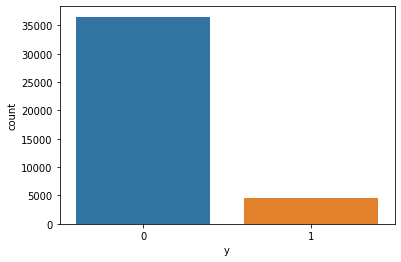

In [8]:
sns.countplot(x='y', data=df)
plt.show()

In [9]:
df['y'].value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

 ### Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Create dummy variables

In [11]:
a = pd.get_dummies(df['job'], prefix='job')
b = pd.get_dummies(df['marital'], prefix='marital')
c = pd.get_dummies(df['education'], prefix='education')
d = pd.get_dummies(df['default'], prefix='default')
e = pd.get_dummies(df['housing'], prefix='housing')
f = pd.get_dummies(df['loan'], prefix='loan')
g = pd.get_dummies(df['contact'], prefix='contact')
h = pd.get_dummies(df['month'], prefix='month')
i = pd.get_dummies(df['day_of_week'], prefix='day_of_week')
j = pd.get_dummies(df['poutcome'], prefix='poutcome')


In [12]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'month', 'day_of_week','poutcome'], axis=1, inplace=True)

df1 = pd.concat([df,a,b,c,d,e,f,g,h,i,j], axis=1)

In [13]:
df1.shape

(41188, 62)

### Divide into X and Y

In [14]:
X = df1.loc[:, df1.columns!='y']
y = df1.loc[:,df1.columns=='y']

In [15]:
X.shape

(41188, 61)

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Handling Imbalanced Data - SMOTE

In [ ]:
!pip install imblearn

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
smote_X_train, smote_y_train = smote.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [18]:
print(y_train['y'].value_counts())
print(smote_y_train['y'].value_counts())

0    25616
1     3215
Name: y, dtype: int64
1    25616
0    25616
Name: y, dtype: int64


### Feature Selection Method - REF (Recursive Feature Elimination)

In [19]:
# https://scikit-learn.org/stable/modules/feature_selection.html

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression()

rfe = RFE(estimator=glm, n_features_to_select=None, step=1)
rfe = rfe.fit(smote_X_train, smote_y_train)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


### Feature Selection Method - REFCV (Recursive Feature Elimination - Cross Validation)

Optimal number of features: 22
Selected features: ['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_services', 'education_Basic', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


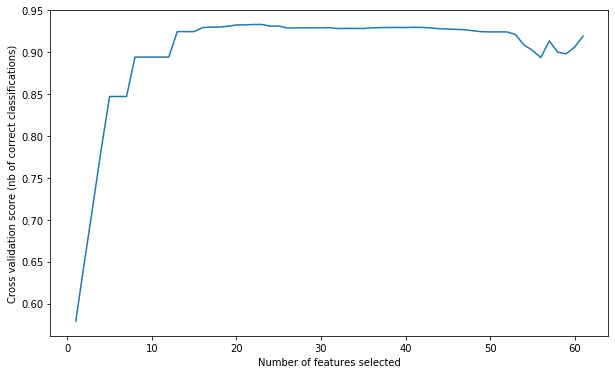

In [20]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression()

rfecv = RFECV(estimator=glm, min_features_to_select=1, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(smote_X_train, smote_y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Preapring final Data set after feature selection

In [21]:
final_features = list(X.columns[rfecv.support_])

In [22]:
smote_X_train_final = smote_X_train[final_features]
X_test_final = X_test[final_features]

print('smote_X_train_final - Shape :', smote_X_train_final.shape)
print('X_test_final - Shape :', X_test_final.shape)

smote_X_train_final - Shape : (51232, 22)
X_test_final - Shape : (12357, 22)


### Final Train Data

In [23]:
# final train data ---- smote_X_train_final
# final test data ----- smote_y_train

In [24]:
smote_X_train_final.shape

(51232, 22)

In [25]:
smote_y_train.shape

(51232, 1)

### Modelling 

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(smote_X_train_final, smote_y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
import statsmodels.api as sm
logit_model = sm.Logit(smote_y_train, smote_X_train_final)
result_logit = logit_model.fit()
print(result_logit.summary2())

Optimization terminated successfully.
         Current function value: 0.351003
         Iterations 8
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.494     
Dependent Variable:           y                          AIC:                        36007.2100
Date:                         2020-04-20 14:09           BIC:                        36192.9365
No. Observations:             51232                      Log-Likelihood:             -17983.   
Df Model:                     20                         LL-Null:                    -35511.   
Df Residuals:                 51211                      LLR p-value:                0.0000    
Converged:                    1.0000                     Scale:                      1.0000    
No. Iterations:               8.0000                                                           
---------------------------------------------------------------------------

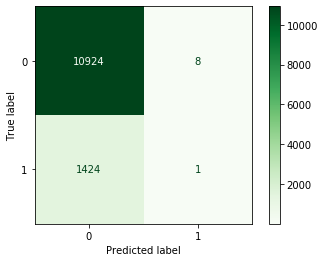

In [28]:
# ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd',
# 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

from sklearn.metrics import plot_confusion_matrix

dis = plot_confusion_matrix(model, X_test_final, y_test, cmap='Greens', values_format='1g')

In [29]:
# This gives prediction either 0 or 1, not in terms of probabilities

y_pred = model.predict(X_test_final)
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10932
           1       0.11      0.00      0.00      1425

    accuracy                           0.88     12357
   macro avg       0.50      0.50      0.47     12357
weighted avg       0.80      0.88      0.83     12357



## Adjust Threshold value to play with Type-I & Type-II error

In [31]:
# This gives prediction in terms of probabilities
y_pred_prob = model.predict_proba((X_test_final))[:,1]
print(y_pred_prob)

print('---------------------------')

# This is how we can control the threshold and play with Type-I error & Type-II error
y_pred_prob_thres = np.where(y_pred_prob > 0.15, 1, 0)
print(y_pred_prob_thres)

[0.03348846 0.05532424 0.16890542 ... 0.18906535 0.17767376 0.07278292]
---------------------------
[0 0 1 ... 1 1 0]


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_prob_thres)
print(confusion_matrix)
print(classification_report(y_test, y_pred_prob_thres))

[[6474 4458]
 [ 606  819]]
              precision    recall  f1-score   support

           0       0.91      0.59      0.72     10932
           1       0.16      0.57      0.24      1425

    accuracy                           0.59     12357
   macro avg       0.53      0.58      0.48     12357
weighted avg       0.83      0.59      0.66     12357



## ROC Curve

Logistic Regression Result: 
Accuracy Score:  0.8841142672169621
log-loss:  4.002551929618155
AUC:  0.6172393616679825


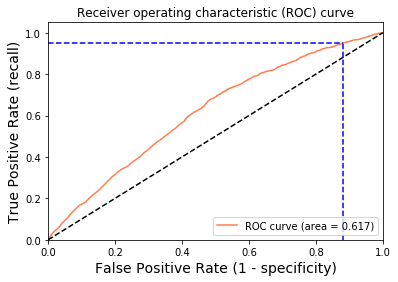

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, log_loss

[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)

print('Logistic Regression Result: ')
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('log-loss: ', log_loss(y_test, y_pred))
print('AUC: ', auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Optimization - GridSearch CV
- https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
- https://www.kaggle.com/funxexcel/p2-logistic-regression-hyperparameter-tuning
- Based on best parameter of GridSearchCV, run again LogisticRegression model and make prediction and play with Type-I & Type-II error

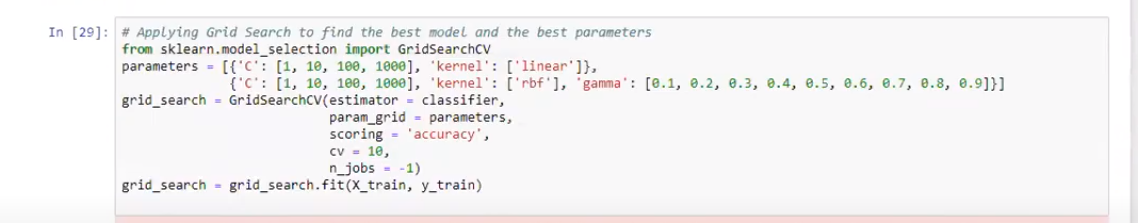

I have run GridSearchCV 3 times below because it was taking too much time to execute otherwise we can simply make list of params and add three dictionaries in it like in snapshot above.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_lm1 = LogisticRegression()

param1 = {'penalty':['l2'],
        'C':[1.0,1.15,1.25,1.5],
        'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter':[100,200,500,1000,2000]
        }

# scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
# we can also use different scoring accuracy in GridSearchCV as parameter, please check the first link above in markdown

clf1 = GridSearchCV(estimator = grid_lm1, param_grid = param1, cv = 5)
best_clf1 = clf1.fit(smote_X_train_final, smote_y_train)


print(best_clf1.best_estimator_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf1.best_params_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf1.best_score_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------------
-----------------------------------------------------------------
{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
-----------------------------------------------------------------
-----------------------------------------------------------------
0.9292275619449262


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_lm2 = LogisticRegression()

param2 = {'penalty':['elasticnet'],
        'C':[1.0,1.15,1.25,1.5],
        'solver':['saga'],
        'max_iter':[100,200,500,1000,2000],
        'l1_ratio': [0.3,0.5,0.7]
        }

clf2 = GridSearchCV(estimator = grid_lm2, param_grid = param2, cv = 5)
best_clf2 = clf2.fit(smote_X_train_final, smote_y_train)



print(best_clf2.best_estimator_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf2.best_params_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf2.best_score_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.3, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------------
-----------------------------------------------------------------
{'C': 1.0, 'l1_ratio': 0.3, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
-----------------------------------------------------------------
-----------------------------------------------------------------
0.9292275619449262


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_lm3 = LogisticRegression()

param3 = {'penalty':['l1'],
        'C':[1.0,1.15,1.25,1.5],
        'solver':['liblinear', 'saga'],
        'max_iter':[100,200,500,1000,2000]
        }

clf3 = GridSearchCV(estimator = grid_lm3, param_grid = param3, cv = 5)
best_clf3 = clf3.fit(smote_X_train_final, smote_y_train)


print(best_clf3.best_estimator_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf3.best_params_)
print('-----------------------------------------------------------------')
print('-----------------------------------------------------------------')
print(best_clf3.best_score_)

LogisticRegression(C=1.15, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------------
-----------------------------------------------------------------
{'C': 1.15, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
-----------------------------------------------------------------
-----------------------------------------------------------------
0.9292470798526065


## Cross Validation
- https://www.ritchieng.com/machine-learning-cross-validation/

In [ ]:
from sklearn.model_selection import cross_val_score